In [1]:
import xarray as xr

In [4]:
ds = xr.open_zarr('output.locinit_Shelf.Nh_10.Nz_20.timedir_back.ntime_2190.dt_360.zarr/')

In [5]:
ds = ds.sortby('trajectory').chunk({"trajectory":"auto"})

/opt/jaspy/lib/python3.11/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing with an out-of-order index is generating 451 times more chunks
  return self.array[key]


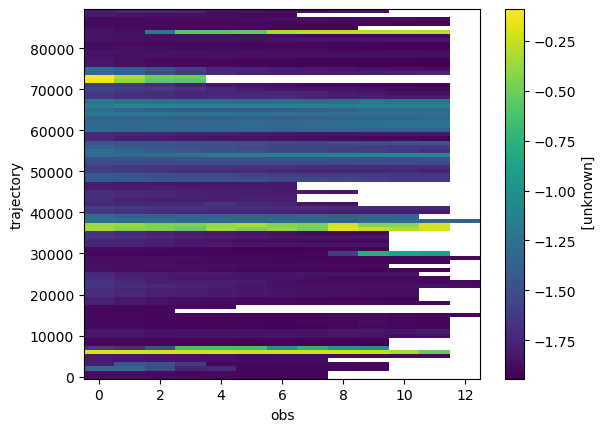

In [50]:
ds['T'][1::1000].plot()

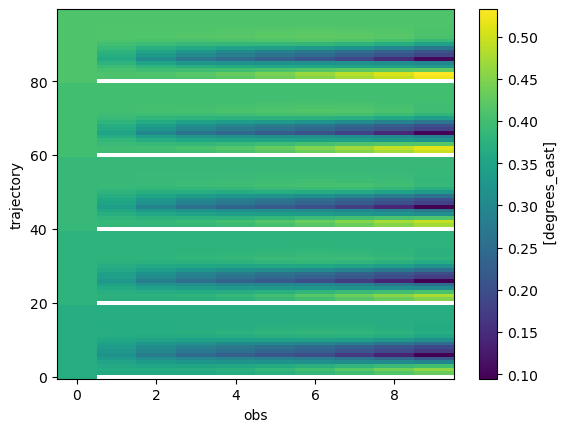

In [43]:
ds.isel(trajectory=slice(0,100))['lon'].plot()

In [37]:
ds

<xarray.Dataset> Size: 15MB
Dimensions:     (trajectory: 90000, obs: 5)
Coordinates:
  * obs         (obs) int32 20B 0 1 2 3 4
  * trajectory  (trajectory) int64 720kB 0 1 2 3 4 ... 89996 89997 89998 89999
Data variables:
    MLD         (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    S           (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    T           (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    lat         (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    lon         (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 4MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
    z           (trajectory, obs) float32 2MB dask.array<chunksize=(90000, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        TSMLDParticleAdvectionRK4_3DSampleTSMLDmixedlayer...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [22]:
import numpy as np
path = '../../data/Shelf.level-1000.sep-500.txt'
init = np.transpose(np.loadtxt(path))
init[0,:]

array([4.16666687e-01, 2.50000000e-01, 1.15416672e+01, 2.27500000e+01,
       3.19833351e+01, 3.70833359e+01, 4.67500000e+01, 4.69166679e+01,
       5.55833359e+01, 6.52500000e+01, 7.59166718e+01, 8.41250019e+01,
       9.38055573e+01, 1.02916672e+02, 1.11916672e+02, 1.21916672e+02,
       1.31750000e+02, 1.41250000e+02, 1.51416672e+02, 1.55916672e+02,
       1.63416672e+02, 1.73250000e+02, 1.82250000e+02, 1.83607152e+02,
       1.96583344e+02, 2.12750000e+02, 2.26416672e+02, 2.37916672e+02,
       2.50416672e+02, 2.63583344e+02, 2.74750000e+02, 2.74750000e+02,
       2.85416687e+02, 2.85583344e+02, 2.92121555e+02, 2.99293484e+02,
       3.07250000e+02, 3.06916687e+02, 3.05716669e+02, 3.03750000e+02,
       3.08750000e+02, 3.20416687e+02, 3.34793712e+02, 3.45623341e+02,
       3.56750000e+02])

In [23]:
init

array([[ 4.16666687e-01,  2.50000000e-01,  1.15416672e+01,
         2.27500000e+01,  3.19833351e+01,  3.70833359e+01,
         4.67500000e+01,  4.69166679e+01,  5.55833359e+01,
         6.52500000e+01,  7.59166718e+01,  8.41250019e+01,
         9.38055573e+01,  1.02916672e+02,  1.11916672e+02,
         1.21916672e+02,  1.31750000e+02,  1.41250000e+02,
         1.51416672e+02,  1.55916672e+02,  1.63416672e+02,
         1.73250000e+02,  1.82250000e+02,  1.83607152e+02,
         1.96583344e+02,  2.12750000e+02,  2.26416672e+02,
         2.37916672e+02,  2.50416672e+02,  2.63583344e+02,
         2.74750000e+02,  2.74750000e+02,  2.85416687e+02,
         2.85583344e+02,  2.92121555e+02,  2.99293484e+02,
         3.07250000e+02,  3.06916687e+02,  3.05716669e+02,
         3.03750000e+02,  3.08750000e+02,  3.20416687e+02,
         3.34793712e+02,  3.45623341e+02,  3.56750000e+02],
       [-6.97025863e+01, -6.96907215e+01, -6.92671661e+01,
        -7.00776291e+01, -6.78669052e+01, -6.87416748e+

In [65]:
dssub = ds.sel(trajectory = slice(4000,4100)).load()

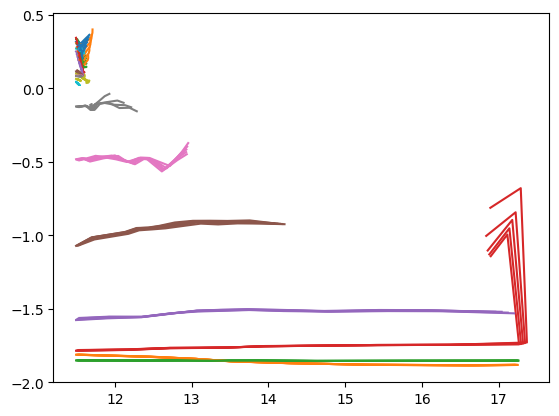

In [68]:
import matplotlib.pyplot as plt
plt.plot(dssub["lon"].T,dssub["T"].T)

In [54]:
ds = xr.open_dataset('/gws/nopw/j04/co2clim/datasets/bSOSE/ITER133/bsose_i133_2013to2018_5day_Uvel.nc')

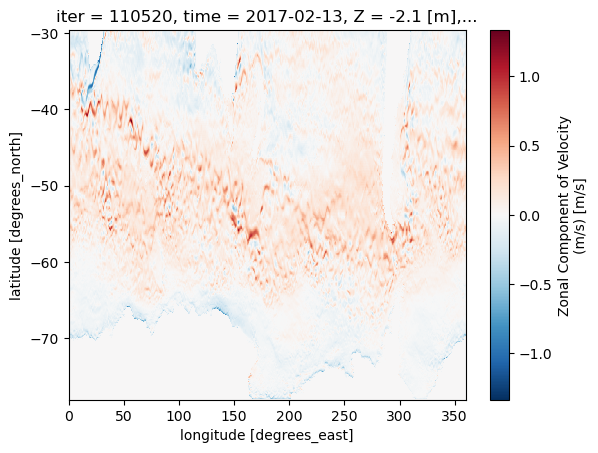

In [21]:
ds['UVEL'].isel(time=300,Z=0).plot()

In [55]:
ds

<xarray.Dataset> Size: 116GB
Dimensions:  (time: 438, YC: 588, XG: 2160, Z: 52)
Coordinates:
    iter     (time) int64 4kB ...
  * time     (time) datetime64[ns] 4kB 2013-01-05 2013-01-10 ... 2018-12-30
  * YC       (YC) float32 2kB -77.98 -77.95 -77.91 ... -30.02 -29.87 -29.72
  * XG       (XG) float32 9kB 5.551e-17 0.1667 0.3333 0.5 ... 359.5 359.7 359.8
  * Z        (Z) float32 208B -2.1 -6.7 -12.15 ... -5e+03 -5.4e+03 -5.8e+03
    dxC      (YC, XG) float32 5MB ...
    rAw      (YC, XG) float32 5MB ...
    dyG      (YC, XG) float32 5MB ...
    drF      (Z) float32 208B ...
    hFacW    (Z, YC, XG) float32 264MB ...
Data variables:
    UVEL     (time, Z, YC, XG) float32 116GB ...